# Исследование надежности заемщиков

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('/datasets/data.csv')

In [12]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [13]:
# основная информация о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [14]:
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**В двух столбцах есть пропущенные значения. `days_employed` и `total_income`**

**На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [15]:
# посчитаем медианное значение ежемесячного дохода по каждому типу занятости

income_median = data.groupby('income_type')['total_income'].median()
income_median

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

In [21]:
# замена пустых значений на медианное

for i in data['income_type'].unique():
    data.loc[(data['income_type'] == i) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == i), 'total_income'].median()

In [17]:
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

Пропущенных значений в столбце 'total_income' больше нет

In [18]:
# заменим все отрицательные значения положительными с помощью метода abs()

data['days_employed'] = data['days_employed'].abs()

In [19]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [20]:
# медианное значение трудового стажа days_employed в днях для каждого типа занятости 

data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть.

In [22]:
# перечень уникальных значений столбца children

data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [24]:
# удаление аномальных значений из столбца children

data = data[(data['children'] >= 0) & (data['children'] <= 5)]
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [25]:
# заполнение пропусков в столбце days_employed медианными значениями по каждому типу занятости income_type

for i in data['income_type'].unique():
    data.loc[(data['income_type'] == i) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == i), 'days_employed'].median()

In [27]:
data.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [28]:
# замена типа данных в столбце total_income на целочисленный с помощью метода astype().

data['total_income'] = data['total_income'].astype('int')

In [29]:
# проверка уникальных значений в столбце education

data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [30]:
# приведение к к нижнему регистру

data['education'] = data['education'].str.lower()

In [31]:
# подсчёт строк дубликатов

data.duplicated().sum()

71

In [32]:
# удаление дубликатов

data = data.drop_duplicates()

**Категоризируем данные, на основании диапазонов созданим столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.**

In [34]:
# создадим функцию categorize_income()


def categorize_income(income):
    if income <= 30000:
        return 'E'
    elif income <= 50000:
        return 'D'
    elif income <= 200000:
        return 'C'
    elif income <= 1000000:
        return 'B'
    else:
        return 'A'

data['total_income_category'] = data['total_income'].apply(categorize_income)

In [35]:
# посмотрим перечень уникальных целей взятия кредита из столбца purpose

data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [36]:
# создадим функцию categorize_purpose()


def categorize_purpose(purpose):
    if 'авто' in purpose:
        return 'операции с автомобилем'
    elif 'жиль' in purpose or 'недвижимост' in purpose:
        return 'операции с недвижимостью'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    elif 'образован' in purpose:
        return 'получение образования'
    
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Исследуем данные и ответим на вопросы гипотез

#### Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для того чтобы посчитать зависимость между количеством детей и возвратом кредита в срок, посчитаем количество клиентов с группировкой по количеству детей и из них выделим клиентов с задолженностью по кредиту.

In [38]:
# Группировка данных и расчет общего количества клиентов и должников

children_group = data.groupby('children')['debt'].agg(['count', 'sum']).reset_index()
#reset_index() для удобства чтения таблицы

In [39]:
# Переименование колонок для удобства

children_group.columns = ['children', 'clients', 'debt']

In [40]:
# Расчет процентного соотношения для каждой группы

children_group['debt_perc'] = round((children_group['debt'] / children_group['clients']) * 100, 2)
children_group

,children,clients,debt,debt_perc
0,0,14091,1063,7.54
1,1,4808,444,9.23
2,2,2052,194,9.45
3,3,330,27,8.18
4,4,41,4,9.76
5,5,9,0,0.00


In [41]:
# Так как категории 3, 4, 5 немногочисленны, отфильтруем их

children_group = children_group.loc[children_group['children'].isin([0, 1, 2])]
children_group

,children,clients,debt,debt_perc
0,0,14091,1063,7.54
1,1,4808,444,9.23
2,2,2052,194,9.45


In [42]:
# Расчет среднего процента должников среди всех клиентов

debt_perc_avg = round(children_group['debt_perc'].mean(), 2)
print(f'Средний процент должников среди всех клиентов: {debt_perc_avg}%')

Средний процент должников среди всех клиентов: 8.74%


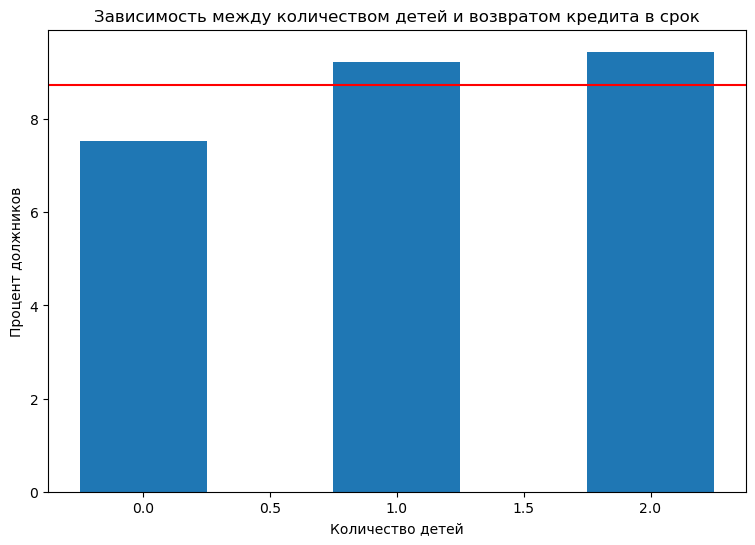

In [43]:
plt.figure(figsize=(9, 6))
plt.bar(children_group['children'], children_group['debt_perc'], width=0.5)
plt.axhline(debt_perc_avg, color='r', linestyle='-')
plt.xlabel('Количество детей')
plt.ylabel('Процент должников')
plt.title('Зависимость между количеством детей и возвратом кредита в срок')
plt.show()

**Вывод:**
- Группы с 1 и 2 детьми имеют наибольший процент должников.
- Группа "бездетных" имеет наименьший процент и показывает себя как наименее рискованная.

#### Есть ли зависимость между семейным положением и возвратом кредита в срок?

Для того чтобы посчитать зависимость между семейным положением и возвратом кредита в срок, посчитаем количество клиентов с группировкой по семейному положению и из них выделим  клиентов с задолженностью по кредиту.

In [45]:
# Группировка по семейному положению и подсчет общего количества клиентов и должников

family_status_group = data.groupby('family_status')['debt'].agg(['count', 'sum']).reset_index()

In [46]:
# Переименование колонок для удобства

family_status_group.columns = ['status', 'clients', 'debt']
family_status_group

,status,clients,debt
0,Не женат / не замужем,2796,273
1,в разводе,1189,84
2,вдовец / вдова,951,63
3,гражданский брак,4134,385
4,женат / замужем,12261,927


In [47]:
# Расчет процентного соотношения для каждой группы и сортировка по процентому соотношению по убыванию.

family_status_group['debt_perc'] = round((family_status_group['debt'] / family_status_group['clients']) * 100, 2)
family_status_group.sort_values('debt_perc', ascending=False)

,status,clients,debt,debt_perc
0,Не женат / не замужем,2796,273,9.76
3,гражданский брак,4134,385,9.31
4,женат / замужем,12261,927,7.56
1,в разводе,1189,84,7.06
2,вдовец / вдова,951,63,6.62


In [48]:
# Расчет среднего процента должников среди всех клиентов

debt_perc_avg_family = round(family_status_group['debt_perc'].mean(), 2)
print(f'Средний процент должников среди всех клиентов: {debt_perc_avg_family}%')

Средний процент должников среди всех клиентов: 8.06%


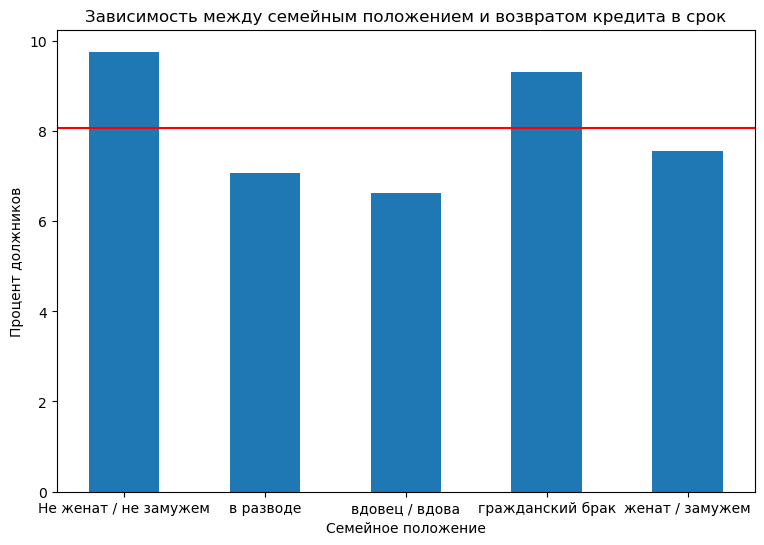

In [49]:
plt.figure(figsize=(9, 6))
plt.bar(family_status_group['status'], family_status_group['debt_perc'], width=0.5)
plt.axhline(debt_perc_avg_family, color='r', linestyle='-')
plt.xlabel('Семейное положение')
plt.ylabel('Процент должников')
plt.title('Зависимость между семейным положением и возвратом кредита в срок')
plt.show()

**Вывод:** cогласно анализу, можно сделать следующие наблюдения:
- группы "Не женат / не замужем" (9.75%) и "гражданский брак" (9.25%) имеют самый высокий риск невозврата по кредиту.
- группы "женат / замужем" (7.54%) и "в разводе" имеют умеренный риск (7.06%)
- группа "вдовец / вдова"имеет самый низкий процент (6.62%), что делает её самой надежной с точки зрения возврата кредита.

#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Для того, чтобы определить зависимость между уровнем дохода и возвратом кредита в срок, выполним группировку на основании ранее выполненной категоризации по уровням дохода.
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

После произведём расчёт количества должников по категориям и определм процентное соотношение.

In [50]:
# Группировка данных и расчет общего количества клиентов и должников

income_gategory_group = data.groupby('total_income_category')['debt'].agg(['count', 'sum']).reset_index()

In [51]:
# Переименование колонок для удобства

income_gategory_group.columns = ['category', 'clients', 'debt']
income_gategory_group

,category,clients,debt
0,A,25,2
1,B,5014,354
2,C,15921,1353
3,D,349,21
4,E,22,2


In [52]:
# Отфильтруем категории A и E из-за небольшой выборки

income_gategory_group = income_gategory_group.loc[income_gategory_group['category'].isin(['B', 'C', 'D'])]
income_gategory_group

,category,clients,debt
1,B,5014,354
2,C,15921,1353
3,D,349,21


In [53]:
# Расчет процентного соотношения для каждой группы

income_gategory_group['debt_perc'] = round((income_gategory_group['debt'] / income_gategory_group['clients']) * 100, 2)
income_gategory_group

/var/folders/k7/lt_cvghj0895zpx23921r0bc0000gp/T/ipykernel_1273/1048303901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_gategory_group['debt_perc'] = round((income_gategory_group['debt'] / income_gategory_group['clients']) * 100, 2)


,category,clients,debt,debt_perc
1,B,5014,354,7.06
2,C,15921,1353,8.50
3,D,349,21,6.02


In [54]:
# Расчет среднего процента должников среди всех клиентов

debt_perc_avg_income = round(income_gategory_group['debt_perc'].mean(), 2)
print(f'Средний процент должников среди всех клиентов: {debt_perc_avg_income}%')

Средний процент должников среди всех клиентов: 7.19%


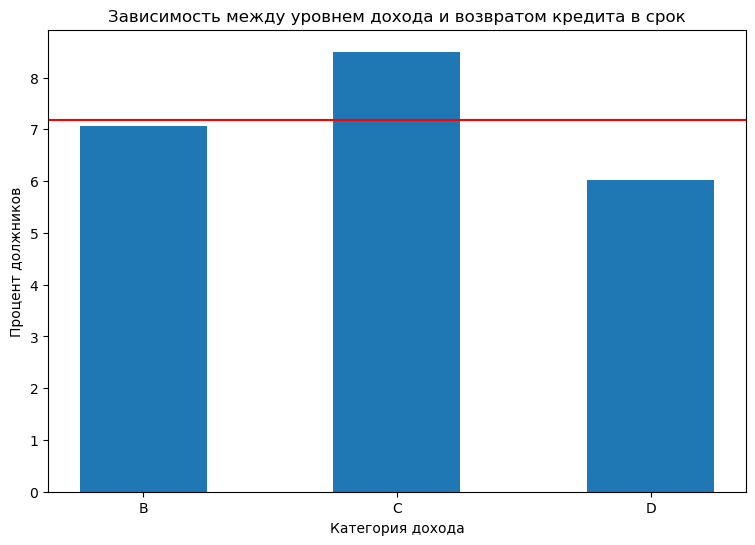

In [55]:
plt.figure(figsize=(9, 6))
plt.bar(income_gategory_group['category'], income_gategory_group['debt_perc'], width=0.5)
plt.axhline(debt_perc_avg_income, color='r', linestyle='-')
plt.xlabel('Категория дохода')
plt.ylabel('Процент должников')
plt.title('Зависимость между уровнем дохода и возвратом кредита в срок')
plt.show()

**Вывод:** согласно проведенному анализу можно выделить следующие наблюдения.

- Категория D (6.02%) имеет самый низкий процент должников, что ниже среднего значения (7.18%).
- Категория B имеет процент должников, близкий к среднему значению, что показывает, что доход в этом диапазоне не является сильным предсказателем невозврата.
- Категория C (8.46%) имеет самый высокий процент должников, что выше среднего значения.

#### Как разные цели кредита влияют на его возврат в срок?

Способ анализа целей кредита аналогичен решениям выше. Посчитаем количество клиентов с группировкой по выполненной ранее категоризации целей выдачи кредита и из них выделим клиентов с задолженностью по кредиту.

In [56]:
# Группировка по семейному положению и подсчет общего количества клиентов и должников

purpose_category_group = data.groupby('purpose_category')['debt'].agg(['count', 'sum']).reset_index()

In [57]:
# Переименование колонок для удобства

purpose_category_group.columns = ['purpose_category', 'clients', 'debt']

In [58]:
# Расчет процентного соотношения для каждой группы

purpose_category_group['debt_perc'] = round((purpose_category_group['debt'] / purpose_category_group['clients']) * 100, 2)
purpose_category_group

,purpose_category,clients,debt,debt_perc
0,операции с автомобилем,4279,400,9.35
1,операции с недвижимостью,10751,780,7.26
2,получение образования,3988,369,9.25
3,проведение свадьбы,2313,183,7.91


In [59]:
# Расчет среднего процента должников

debt_perc_avg_purpose = round(purpose_category_group['debt_perc'].mean(), 2)
print(f'Средний процент должников среди всех клиентов: {debt_perc_avg_purpose}%')

Средний процент должников среди всех клиентов: 8.44%


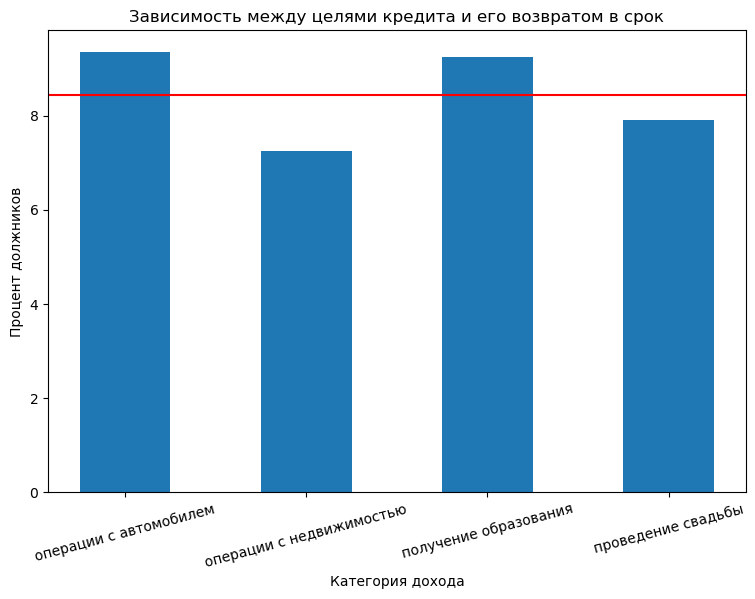

In [60]:
plt.figure(figsize=(9, 6))
plt.bar(purpose_category_group['purpose_category'], purpose_category_group['debt_perc'], width=0.5)
plt.axhline(debt_perc_avg_purpose, color='r', linestyle='-')
plt.xlabel('Категория дохода')
plt.ylabel('Процент должников')
plt.title('Зависимость между целями кредита и его возвратом в срок')
plt.xticks(rotation=15)
plt.show()

**Вывод:** Операции с автомобилем (9.33%) и получение образования (9.23%) имеют больший процент должников, что выше среднего значения (8.41%). Это может указывать на более высокий риск невозврата кредитов для этих целей.

Операции с недвижимостью (7.24%) и проведение свадьбы (7.83%) имеют меньший процент должников, что ниже среднего значения. Эти цели кредита представляются более надежными в плане возврата.

Таким образом, можно заключить, что кредиты, выданные на операции с автомобилем и получение образования, имеют больший риск невозврата по сравнению с кредитами на операции с недвижимостью и проведение свадьбы.

### Общий вывод.

В исследовании были использованы данные о клиентах, включающие такие параметры, как количество детей, трудовой стаж, возраст, уровень образования, семейное положение, пол, тип занятости, наличие задолженности по кредитам, ежемесячный доход и цель получения кредита. Была выполнена категоризация данных и проведён анализ. Клиенты были сгруппированы согласно проверяемой гипотезы, посчитано их количество и выявлено процентное соотношение должников, которое было сопоставлено со средним значением должников из всей выборки. Это позволило выделить важные зависимости и сделать вывод о надёжности или ненадёжности клиентов.

Данное исследование показало, что различные взаимосвязи влияют на возврат кредита клиентами.

**Основные выводы:**

1. **Количество детей и возврат кредита:** Группы с 1 и 2 детьми имеют наибольший процент должников, что указывает на повышенный риск. Группа "бездетных" имеет наименьший процент должников, что делает её менее рискованной.


2. **Семейное положение и возврат кредита:** Неженатые/незамужние или находящиеся в гражданском браке имеют самый высокий риск невозврата кредита. Люди находящиеся в браке или в разводе, а также вдовцы/вдовы, являются более надежными группами.


3. **Уровень дохода и возврат кредита:** Категория D (доход от 30 001 до 50 000) имеет самый низкий процент должников (6.02%), что значительно ниже среднего значения (7.18%). Категория B (доход от 200 001 до 1 000 000) имеет процент должников, близкий к среднему значению, что показывает, что доход в этом диапазоне не является сильным предсказателем невозврата. Категория C (доход от 50 001 до 200 000) имеет самый высокий процент должников (8.46%), что выше среднего значения.


4. **Цели кредита и возврат кредита:** Кредиты на операции с автомобилем (9.33%) и получение образования (9.23%) имеют больший риск невозврата, так как процент должников выше среднего. Кредиты на операции с недвижимостью (7.24%) и проведение свадьбы (7.83%) имеют меньший риск невозврата, так как процент должников ниже среднего.

**Портреты клиентов:**

**Идеальный клиент:**
Без детей или с минимальным количеством детей.
Женат/замужем или вдовец/вдова.
Имеет доход в категории D (от 30 001 до 50 000).
Берет кредит на операции с недвижимостью или проведение свадьбы.

**Неидеальный клиент:**
Имеет 1 или 2 детей.
Неженат/незамужем или находится в гражданском браке.
Имеет доход в категории C (от 50 001 до 200 000).
Берет кредит на операции с автомобилем или получение образования.


**Дополнительное предложение:**

Для более полного понимания факторов, влияющих на возврат кредита в срок, предлагаю также учитывать такой фактор, как сумма кредита. Это позволит разделить кредиты на категории по суммам и провести анализ, чтобы проверить гипотезу: *Есть ли зависимость между суммой выданного кредита и возвратом кредита в срок?*